In [235]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import math

def plot_data_theory(datafile, x_col, y_col, theory_col='', title='', x_label='', y_label='', x_unit='', y_unit='', x_error=0.0, y_error=0.0, theory_error=0.0, no_reg = False, desc = '', ytype='linear', xtype='linear',
                     set_x=None, set_y=None, droite=False, axes0=False):

    df = pd.read_excel('data/'+datafile+'.xlsx')

    x = df[x_col]
    y = df[y_col]

    # Create figure and axes
    fig, ax = plt.subplots()
    plt.yscale(ytype)
    plt.xscale(xtype)

    if theory_col != '':
        theory = df[theory_col]
        # Add theoretical data to the plot
        ax.plot(x, theory, '-', label='Théorique', lw=1, color='orange')
        if theory_error > 0:
            ax.errorbar(x, theory, yerr=theory_error, fmt='none', capsize=2, ecolor='orange')

    if not no_reg:
        # Calculate linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        a = slope
        b = intercept

        # Calcul de l'incertitude sur la pente
        delta_slope = get_delta_slope(x,y,x_error,y_error)
        ax.text(0.95, 0.15, f'a = {a:.4e} +- {delta_slope:1.0e}', transform=ax.transAxes, ha='right')
        ax.text(0.95, 0.10, f'b ~= {b:.4e}', transform=ax.transAxes, ha='right')

        # Add linear regression to the plot
        x_reg = np.linspace(x.min(), x.max(), 100)
        y_reg = slope * x_reg + intercept
        ax.plot(x_reg, y_reg, '--', label=f'Régression linéaire: f(x)=ax+b', lw=1, color='cyan')

        # Add R^2 value to the plot
        ax.text(0.05, 0.95, f'$R^2 = {r_value**2:.2f}$', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    # Add data points to the plot
    if droite:
        ax.plot(x, y, label=desc)
    elif desc == '':
        ax.plot(x, y, 'o', label='Données expérimentales', ms=5, mec='cyan', mew=1)
    else:
        ax.plot(x, y, 'o', label=desc, ms=5, mec='cyan', mew=1)

    # Add axis labels and title
    ax.set_xlabel(x_label + ' (' + x_unit + ')')
    ax.set_ylabel(y_label + ' (' + y_unit + ')')
    ax.set_title(title)

    # Add legend
    ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

    # Add error bars
    if x_error > 0:
        ax.errorbar(x, y, xerr=x_error, fmt='none', capsize=3, ecolor='cyan')
    if y_error > 0:
        ax.errorbar(x, y, yerr=y_error, fmt='none', capsize=3, ecolor='cyan')

    # Add power of 10 scale to axes
    ax.yaxis.set_major_formatter('{x:.1e}')
    ax.xaxis.set_major_formatter('{x:.1e}')

    #Define borns
    if set_x:
        plt.xlim(set_x[0], set_x[1])
    if set_y:
        plt.ylim(set_y[0], set_y[1])


    # Afficher les axes x=0 et y=0
    if axes0:
        ax.axhline(y=0, color='black')
        ax.axvline(x=0, color='black')

    plt.show()

def get_delta_slope(x,y,x_err,y_err):
    n = np.size(x)-1
    x1max = x[0] + x_err
    y1max = y[0] - y_err
    x2max = x[n] - x_err
    y2max = y[n] + y_err

    slopemax = (y2max-y1max)/(x2max-x1max)

    x1min = x[0] - x_err
    y1min = y[0] + y_err
    x2min = x[n] + x_err
    y2min = y[n] - y_err

    slopemin = (y2min-y1min)/(x2min-x1min)

    final = abs(slopemax-slopemin)
    final /= 2
    return final

def get_incertitude(tab_val,cst):
    """
    Permet de récupérer les valeurs d'incertitudes d'une équation prenant plusieurs variables
    :param cst: constante à laquelle multiplier le final
    :param tab_val: [(valeur,incertitude_absolue,puissance),...]
    :return: tuple (valeur_finale,incertitude_finale)
    """
    valeur_finale = cst
    incertitude_finale = 0

    for val,inc_abs,puiss in tab_val:
        valeur_finale *= val**puiss
        incertitude_finale += (puiss*inc_abs/val)**2
    incertitude_finale = valeur_finale * np.sqrt(incertitude_finale)

    return valeur_finale,incertitude_finale

def get_resistivity_from_length(slope, delta_slope, diameter, delta_diameter):
    #Permet d'obtenir la resistivité
    return get_incertitude([(slope,delta_slope,1),(diameter,delta_diameter,2)],math.pi/4)

def get_resistivity_from_diameter(slope, delta_slope, length,delta_length):
    #Permet d'obtenir la resistivité
    return get_incertitude([(slope,delta_slope,1),(length,delta_length,-1)],math.pi/4)

In [236]:
#Test pour une valeur connue
get_incertitude([(1.52,0.02,2),(156,5,-1)],1)

(0.01481025641025641, 0.000614189289599054)

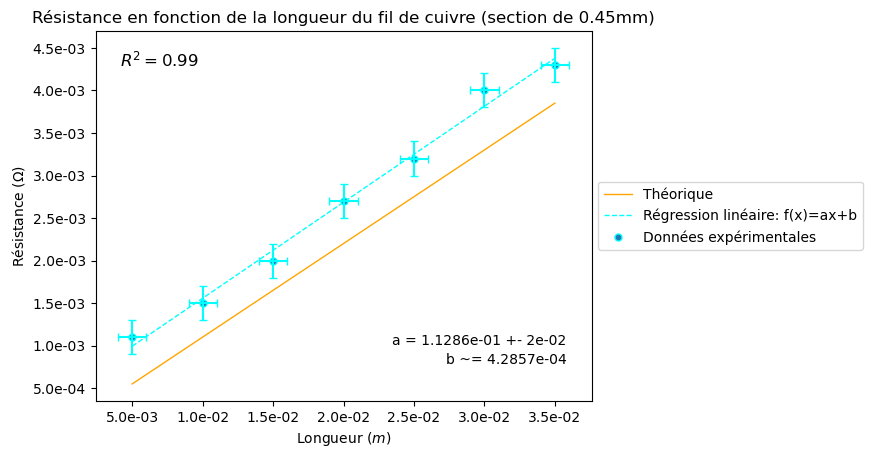

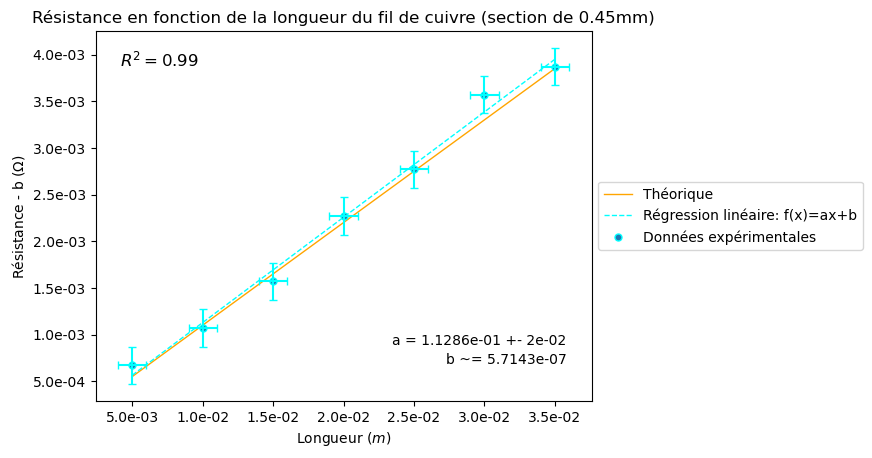

(1.749474408967816e-08, 3.274517001238273e-09)


In [245]:
# appel de la fonction pour tracer le graphique pour 0.45 mm de section de cuivre
plot_data_theory('data045', 'Longueur', 'Resistance', 'Theorique',
                  title='Résistance en fonction de la longueur du fil de cuivre (section de 0.45mm)',
                  x_label='Longueur', y_label='Résistance',x_unit='$m$',y_unit=r'$\Omega$',x_error=0.001,y_error=0.0002)

#Si on retire b
plot_data_theory('data045', 'Longueur', 'Resistance-', 'Theorique',
                  title='Résistance en fonction de la longueur du fil de cuivre (section de 0.45mm)',
                  x_label='Longueur', y_label='Résistance - b',x_unit='$m$',y_unit=r'$\Omega$',x_error=0.001,y_error=0.0002)

print(get_resistivity_from_length(0.11,0.02,0.00045,0.00001))

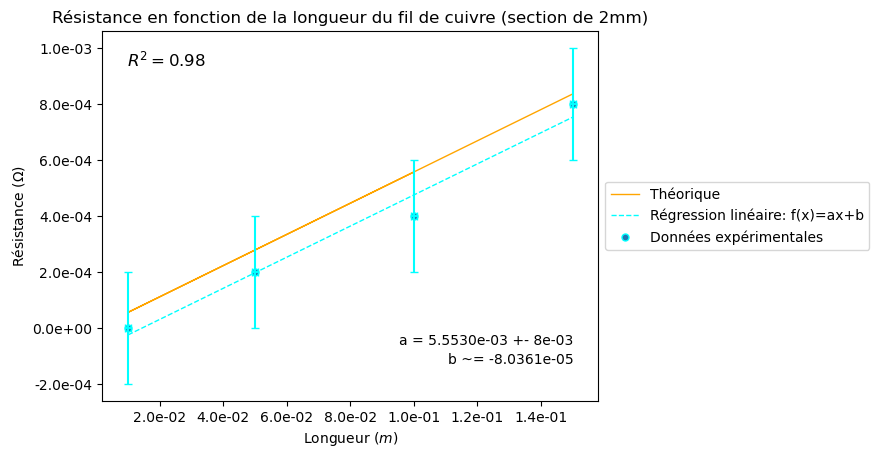

(1.5707963267948965e-08, 2.5133232097776873e-08)


In [238]:
# appel de la fonction pour tracer le graphique pour 2 mm de section de cuivre
plot_data_theory('data2', 'Longueur', 'Resistance', 'Theorique',
                  title='Résistance en fonction de la longueur du fil de cuivre (section de 2mm)',
                  x_label='Longueur', y_label='Résistance',x_unit='$m$',y_unit=r'$\Omega$',x_error=0.001,y_error=0.0002)
print(get_resistivity_from_length(0.005,0.008,0.002,0.00001))

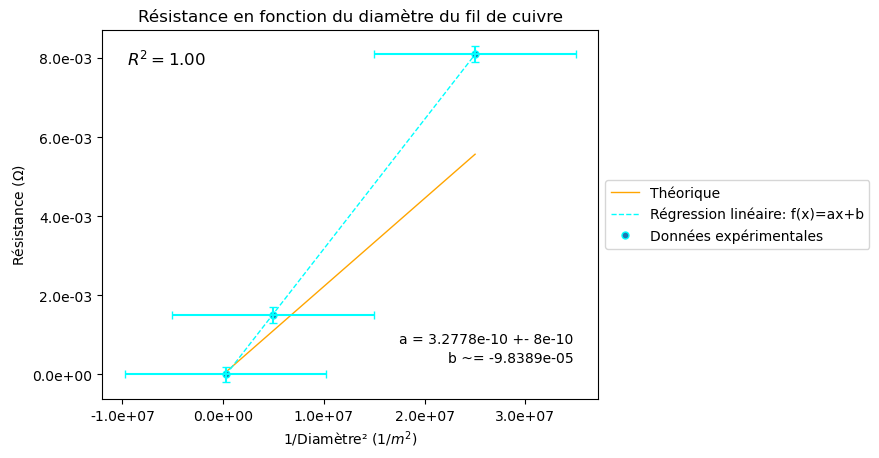

(2.3561944901923447e-08, 6.358238357630173e-08)


In [239]:
# appel de la fonction pour tracer le graphique pour le diamètre avec un fil de 1mm de long
plot_data_theory('data_diam', 'Diametre^-2', 'Resistance', 'Theorique',
                  title='Résistance en fonction du diamètre du fil de cuivre',
                  x_label='1/Diamètre²', y_label='Résistance',x_unit=r'$1/m^2$',y_unit=r'$\Omega$',x_error=10000000,y_error=0.0002)
print(get_resistivity_from_diameter(0.0000000003,0.000000000809,0.01,0.001))

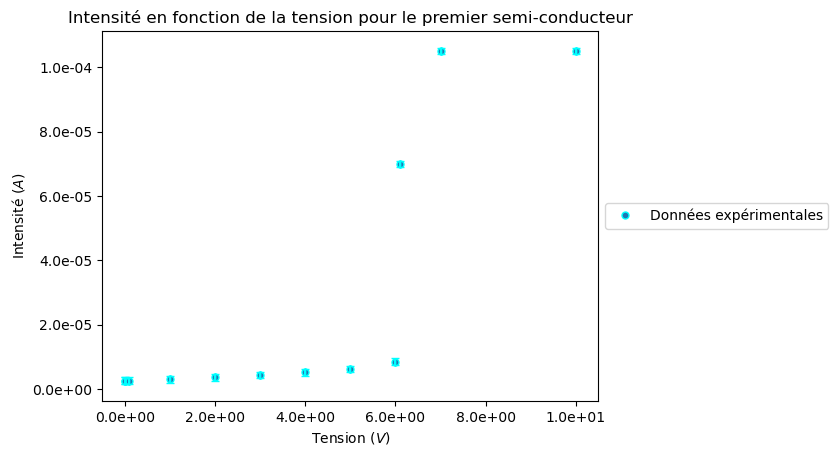

In [240]:
# appel de la fonction pour tracer le graphique pour intensité en fonction de la tension pour le premier semi
plot_data_theory('data_semi', 'Tension', 'Intensité',
                  title='Intensité en fonction de la tension pour le premier semi-conducteur',
                  x_label='Tension', y_label='Intensité',x_unit='$V$',y_unit='$A$',x_error=0.0005,y_error=0.000001,no_reg = True)

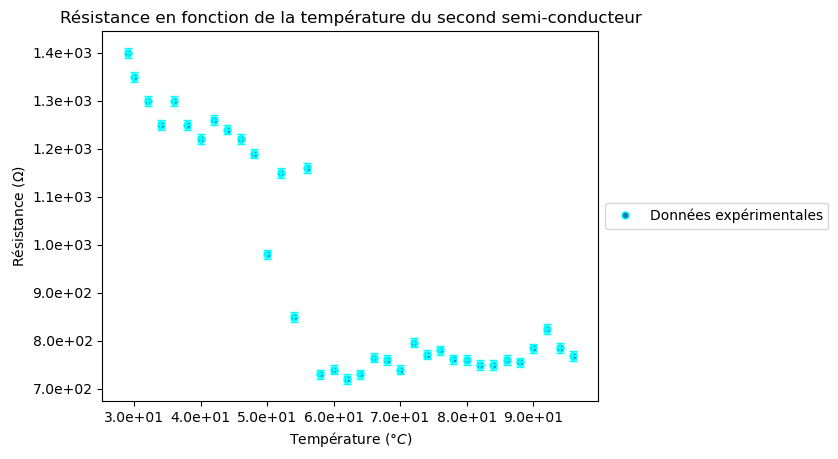

In [241]:
# appel de la fonction pour tracer le graphique de la résistance en fonction de la température pour le deuxième semi
plot_data_theory('data_temp_semi2', 'Temp', 'Ohms',
                 title='Résistance en fonction de la température du second semi-conducteur',
                 x_label='Température', y_label='Résistance', x_unit='$°C$', y_unit=r'$\Omega$', x_error=0.4,
                 y_error=10, no_reg=True)

ValueError: too many values to unpack (expected 1)

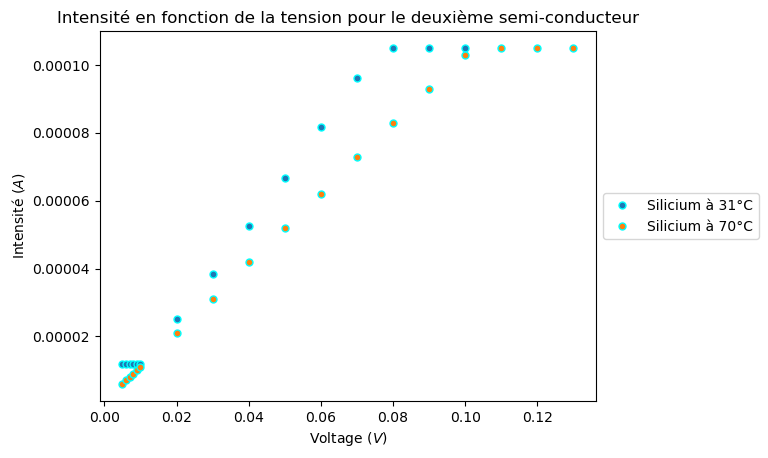

In [242]:
# appel de la fonction pour tracer le graphique de la résistance en fonction de la température pour le deuxième semi
plot_data_theory('data_difftemp_vi', ['V31','V70'], ['I31','I70'],
                 desc = ['Silicium à 31°C','Silicium à 70°C'],
                 title='Intensité en fonction de la tension pour le deuxième semi-conducteur',
                 x_label='Voltage', y_label='Intensité', x_unit='$V$', y_unit='$A$', x_error=0.0001,
                 y_error=0.000001, no_reg=True)

In [243]:
# On calcule l'incertitude de la resistivité avec la formule p = R*pi*D²/(4l)
# On choisit ici l'incertitude globale sur la résistance et une valeur moyenne

get_incertitude([(0.011,0.0001,1),(0.0005,0.00001,2),(0.1,0.01,-1)],math.pi/4)
#TODO

(2.1598449493429822e-08, 2.334496129837556e-09)

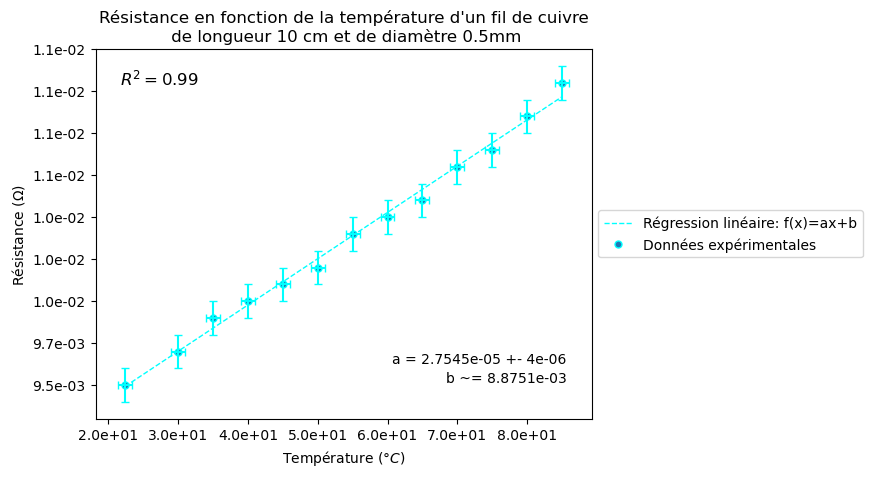

Incertitude de R/R0 : 
0.01414213562373095
Incertitude de T-TO : 2


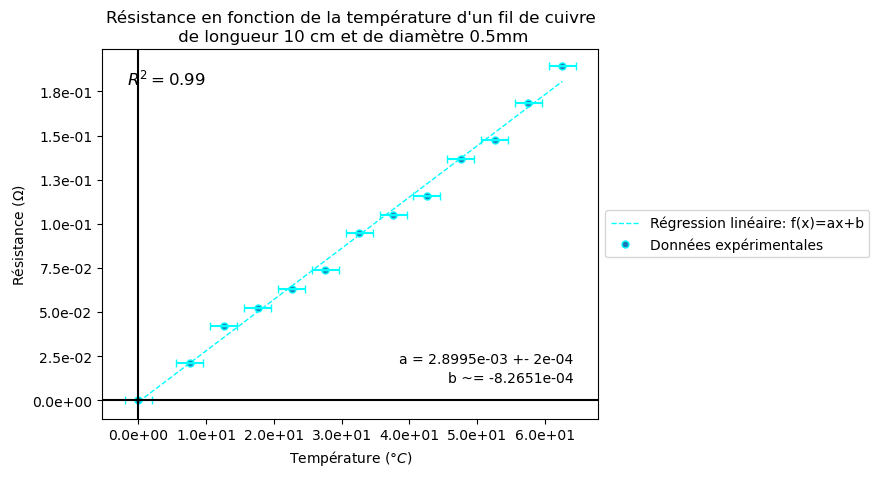

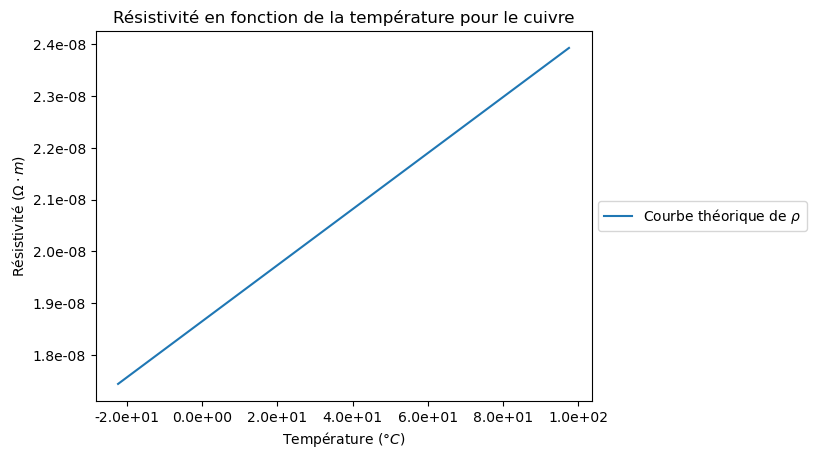

In [244]:
# appel de la fonction pour tracer le graphique de la résistance en fonction de la température pour un fil de taille
plot_data_theory('data_cuivre_temp', 'Température', 'Résistance',
                 title="Résistance en fonction de la température d'un fil de cuivre\n de longueur 10 cm et de diamètre 0.5mm",
                 x_label='Température', y_label='Résistance', x_unit='$°C$', y_unit=r'$\Omega$', x_error=1,
                 y_error=0.0001)
#b non nul, on divise alors par RO la température la plus faible à 22,4°C et pour la température on exprime DeltaT
a,b = get_incertitude([(0.01,0.0001,1),(0.01,0.0001,-1)],1)
print("Incertitude de R/R0 : ")
print(b)
print("Incertitude de T-TO : 2")
plot_data_theory('data_cuivre_temp', 'DeltaTemp', 'Resistance-',
                 title="Résistance en fonction de la température d'un fil de cuivre\n de longueur 10 cm et de diamètre 0.5mm",
                 x_label='Température', y_label='Résistance', x_unit='$°C$', y_unit=r'$\Omega$', x_error=2,
                 y_error=0.000001,axes0=True)

plot_data_theory('data_cuivre_temp', 'AllDeltaTemp', 'AllResistivite',
                 title="Résistivité en fonction de la température pour le cuivre",
                 x_label='Température', y_label=r'Résistivité', x_unit='$°C$', y_unit=r'$\Omega\cdot m$',no_reg=True,desc=r"Courbe théorique de $\rho$",droite=True) #On entre ici l'incertitude trouvée plus haut